In [1]:
pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6e4c384771c7d28769019b239d5e9cd782902c018fa2a969ce307ca863f633b4
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [19]:
pip install group-lasso

---

# Section 0 Preamble

In [2]:
#Run Section 0 before proceeding to Section 1 or Section 2.  Section 1 can be skipped.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge, Lasso

from group_lasso import GroupLasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.width', 1000)      # total width in characters
pd.set_option('display.max_columns', None)

results = []
results2 = []
results3 = []


---

# Section 1 EDA

In [20]:
college = pd.read_csv('College.csv')
college2 = pd.read_csv('College.csv', index_col = 0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis = 1)
college3 = college3.set_index('College')
college = college3
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [21]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [24]:
college['Total Cost'] = college['Room.Board'] + college['Books'] + college['Outstate'] + college['Personal']
college['IsPrivate'] = college['Private'].map({'Yes': 1.0, 'No': 0.0})
college = college.drop(columns = ['Private'])
college['AcceptRate'] = college['Accept']/college['Apps']
college['EnrollRate'] = college['Enroll']/college['Apps']
college['MatriculationRate'] = college['Enroll']/college['Accept']

In [25]:
corr_matrix = college.corr()

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask: set lower triangle to NaN
upper_tri = corr_matrix.mask(mask)
print(upper_tri.round(2))

                   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total Cost  IsPrivate  AcceptRate  EnrollRate  MatriculationRate
Apps                NaN    0.94    0.85       0.34       0.35         0.81         0.40      0.05        0.16   0.13      0.18  0.39      0.37       0.10        -0.09    0.26       0.15        0.11      -0.43       -0.39       -0.31              -0.14
Accept              NaN     NaN    0.91       0.19       0.25         0.87         0.44     -0.03        0.09   0.11      0.20  0.36      0.34       0.18        -0.16    0.12       0.07        0.03      -0.48       -0.18       -0.21              -0.16
Enroll              NaN     NaN     NaN       0.18       0.23         0.96         0.51     -0.16       -0.04   0.11      0.28  0.33      0.31       0.24        -0.18    0.06      -0.02       -0.10      -0.57       -0.15        0.00            

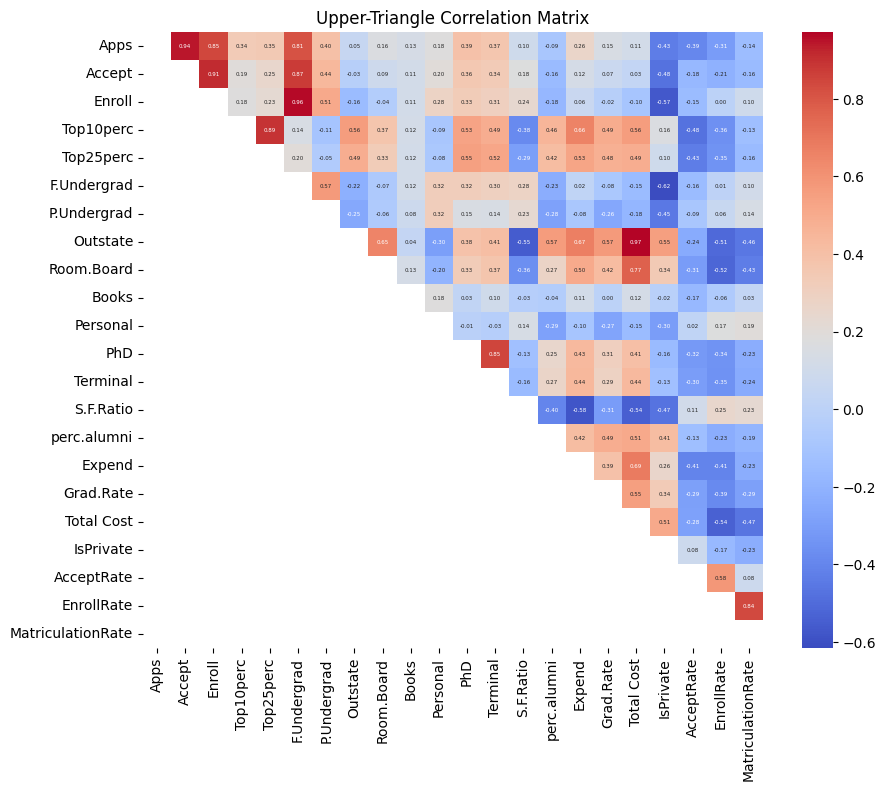

In [26]:
plt.figure(figsize=(10, 8))
#annot_kws changes the font size of the annotations
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 4})
plt.title("Upper-Triangle Correlation Matrix")
plt.show()

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

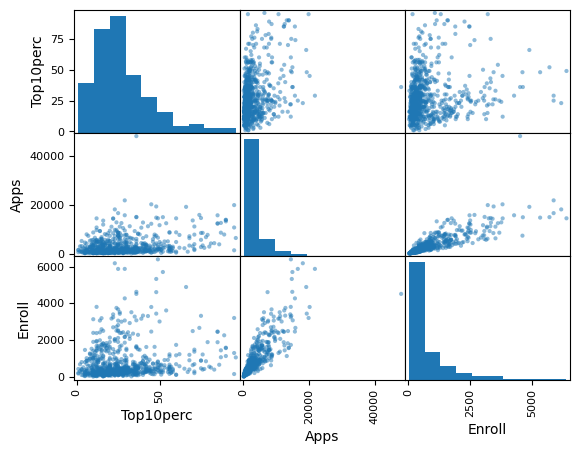

In [27]:
C = ['Top10perc','Apps','Enroll']
pd.plotting.scatter_matrix(college[C])


<Axes: title={'center': 'Outstate'}, xlabel='IsPrivate'>

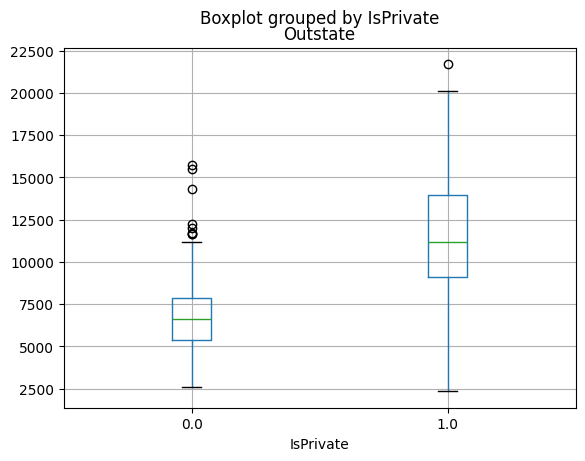

In [29]:
#Private is a categorical for whether the uni is public or private.  The boxplot gives distribution of Outstate (outstate tuition) for each group
college.boxplot(column = 'Outstate', by = 'IsPrivate')

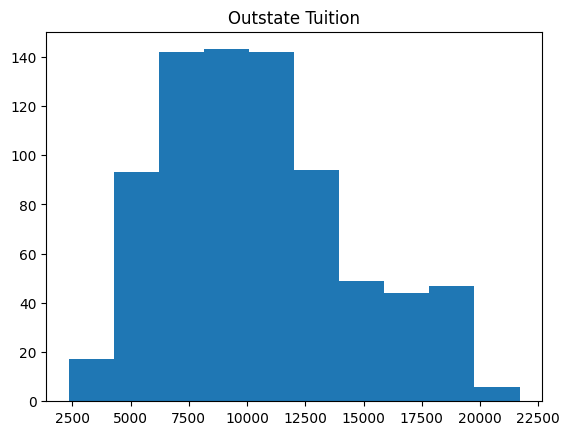

In [30]:
plt.hist(college['Outstate'])
plt.title("Outstate Tuition")
plt.savefig("boxplot_outstate.png")

array([[<Axes: xlabel='Outstate', ylabel='Outstate'>,
        <Axes: xlabel='Total Cost', ylabel='Outstate'>],
       [<Axes: xlabel='Outstate', ylabel='Total Cost'>,
        <Axes: xlabel='Total Cost', ylabel='Total Cost'>]], dtype=object)

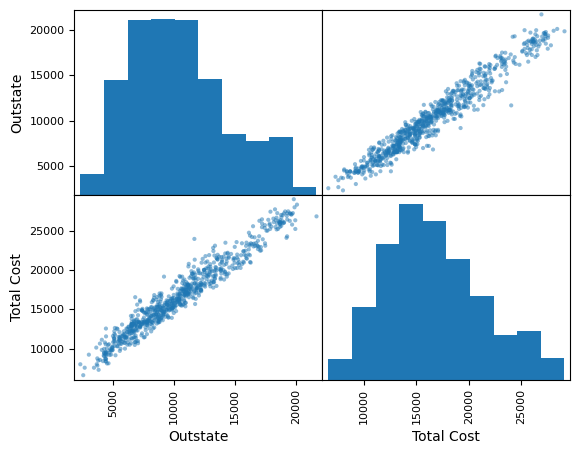

In [31]:
C = ['Outstate','Total Cost']
pd.plotting.scatter_matrix(college[C])

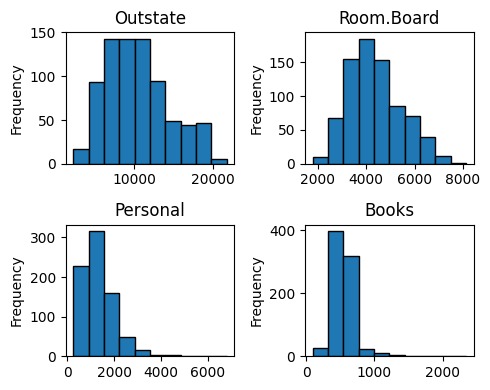

In [32]:
#save fig and axes as outputs from the subplots function.
fig, axes = plt.subplots(2, 2, figsize=(5,4))

quantVar = ['Outstate','Room.Board','Personal','Books']
binNum = [10,10,10,10]
#axes.ravel() accesses the four subplot locations
Axes = axes.ravel()
#zip makes three-dimensional tuples that pair corresponding elements.
tupleList = zip(Axes,quantVar,binNum)

#iterate over the tupleList with reference to the entries in each tuple.
for a, q, b in tupleList:
    college[q].plot.hist(bins=b, ax=a, edgecolor='black')
    a.set_title(q)

plt.tight_layout()

In [33]:
#this variable makes 2 groups.  An Elite uni is one where more than 50% of the students is in the top 10 percent
#1. The variable 'Top10perc' is being binned.  It is a percentage expressed as an integer.
#2. Then bins are (0,50] and (50,100]
#3. The two bins are labeled.
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100],labels=['No','Yes'])

In [34]:
college['Elite'].value_counts()

,count
Elite,
No,699
Yes,78


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

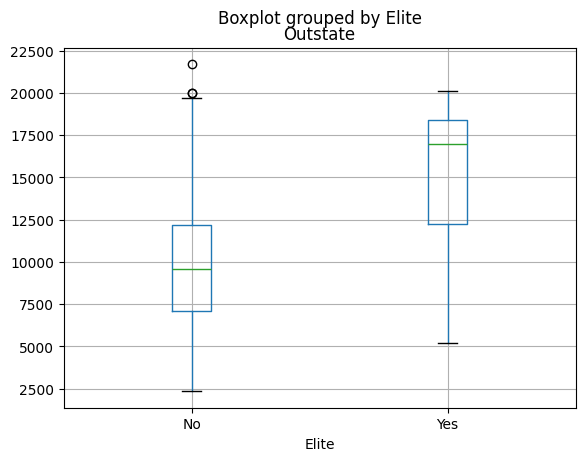

In [35]:
college.boxplot(column = 'Outstate', by = 'Elite')
#Show outstate tuition for Elite and non-Elite schools

In [37]:
# Change this path to wherever you want in your Drive
project_folder = "/content/drive/MyDrive/ISLP/Dataset-College/figures"
os.makedirs(project_folder, exist_ok=True)

In [38]:
# Example figure
plt.hist(college['Outstate'])
plt.title("Out-of-State Tuition")

# Save directly to Google Drive
plt.savefig(os.path.join(project_folder, "boxplot_outstate.png"))
plt.close()

In [39]:


#make a folder called figures if it doesn't exist
os.makedirs("figures",exist_ok = True)
plt.savefig("figures/boxplot_outstate.png")

<Figure size 640x480 with 0 Axes>

---

# Section 2 Categorical Embedding and Scaling

In [3]:
college = pd.read_csv('College.csv')
college = college.rename({'Unnamed: 0': 'College'}, axis = 1)
college = college.set_index('College')
college = college.drop(columns = ['Room.Board','Personal','Books'])

In [4]:
#college['Total Cost'] = college['Room.Board'] + college['Books'] + college['Outstate'] + college['Personal']
#This is the one-hot encoding
college['IsPrivate'] = college['Private'].map({'Yes': 1.0, 'No': 0.0})
college = college.drop(columns = ['Private'])

college['AcceptRate'] = college['Accept']/college['Apps']
college['EnrollRate'] = college['Enroll']/college['Apps']
college['MatriculationRate'] = college['Enroll']/college['Accept']

In [5]:
college_private = college[college['IsPrivate'] == 1].drop(columns=['IsPrivate'])
college_public  = college[college['IsPrivate'] == 0].drop(columns=['IsPrivate'])

college_num = college_private.select_dtypes(include='number')  # take college and keep only the numerical values

scaler = StandardScaler()
college_scaled = pd.DataFrame(scaler.fit_transform(college_num), columns=college_num.columns)

college_num2 = college_public.select_dtypes(include='number')
college_scaled2 = pd.DataFrame(scaler.fit_transform(college_num2), columns=college_num2.columns)

---

# Section 3 Predicting Outstate Tuition

In [6]:
y = college_scaled["Outstate"]
#X will be the non-Outstate variables
X = college_scaled.drop(columns=["Outstate"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

print("R^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

#Below results will be combined with later ones in this section

results.append({
    'Model': 'OLS-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_ols_private = pd.DataFrame({'Feature': X.columns, 'OLS-Private': model.coef_})

              Feature  Coefficient
0                Apps     0.038988
1              Accept     0.484745
2              Enroll    -0.521981
3           Top10perc     0.118517
4           Top25perc    -0.009756
5         F.Undergrad     0.073516
6         P.Undergrad    -0.012563
7                 PhD    -0.021561
8            Terminal     0.215797
9           S.F.Ratio    -0.035619
10        perc.alumni     0.142498
11             Expend     0.310259
12          Grad.Rate     0.141192
13         AcceptRate     0.067370
14         EnrollRate    -0.130369
15  MatriculationRate     0.020630
R^2: 0.7029050585861051
RMSE: 0.526855005313587


Performing OLS on the Private schools produces an R^2 of 0.70 and an RMSE of 0.53.  An R^2 of 0.70 says that about 70 percent of the variance in Outstate tuition is explained by this model.  The remaining 30 percent is unexplained variation, either random noise or features not included.  Because the data are normalized, the RMSE of 0.53 is the number of standard deviations in the model, i.e. predictions are typically within 0.53 standard deviations away from the true value.  For example, if Outstate tuition was found to have a standard deviation of 4000, then the RMSE is 0.53 x 4000 = 2120.

The importances of each feature are listed.  Positive importance mean that feature is positively correlated with Outstate tuition.  Negative importance means that feature is negatively correlated with Outstate tuition.  A larger scale means that feature is more important to explain Outstate tuition.  Unfortunately, an artefact of this model is multicollinearity, e.g. PhD and Terminal will be highly correlated so that the effect of PhD is not represented properly.  Ridge regression and Lasso will help handle this ambiguity.

In [ ]:
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength, will not shrink coeffs much when they are standardized (as they are)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

coef_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print("Ridge Coefficients:\n", coef_ridge)

print("Ridge R^2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

In [7]:
lasso_model = Lasso(alpha=0.1)  # smaller alpha → less shrinkage, larger alpha → more shrinkage
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

coef_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Coefficients:\n", coef_lasso)

print("Lasso R^2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

results.append({
    'Model': 'Lasso-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_lasso_private = pd.DataFrame({'Feature': X.columns, 'Lasso-Private': model.coef_})
feature_split_df = pd.merge(importances_ols_private, importances_lasso_private, on='Feature')

Lasso Coefficients:
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.000000
2              Enroll     0.000000
3           Top10perc     0.042104
4           Top25perc     0.000000
5         F.Undergrad     0.000000
6         P.Undergrad    -0.000000
7                 PhD     0.000000
8            Terminal     0.194313
9           S.F.Ratio    -0.000000
10        perc.alumni     0.067438
11             Expend     0.326750
12          Grad.Rate     0.123441
13         AcceptRate    -0.000000
14         EnrollRate    -0.066995
15  MatriculationRate    -0.101211
Lasso R^2: 0.6704032726124476
Lasso RMSE: 0.5549258132738367


I performed Ridge regression with a regularization parameter of alpha = 1.0 but it did not meaningfully change the results compared to OLS.  Fine-tuning this alpha may produce more meaningful results; will return to this at a later date.

More interesting results come from Lasso regression with a regularization parameter of alpha = 0.1.  This results in many features having zero importance, performing automatic feature selection and removing multicollinearity.  We can see the most important factors in predicting Outstate Tuition are Expenses, Terminal degrees of faculty, Graduation rate, Matriculation rate, among others.  The R^2 slightly reduces to 0.67 from OLS because the prediction is less flexible, preferring to rely on fewer less correlated predictors.  33 percent of the model is left unexplained.  Similarly, the RMSE is 0.55 meaning predictions can be expected to deviate from the true results by 0.55 standard deviations.  This indicates an increase in bias but decrease in variance, i.e. R^2.

In [8]:
y2 = college_scaled2["Outstate"]
#X will be the non-Outstate variables
X2 = college_scaled2.drop(columns=["Outstate"])


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

coef_df2 = pd.DataFrame({'Feature': X2.columns, 'Coefficient': model.coef_})
print(coef_df2)

print("R^2:", r2_score(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))

results.append({
    'Model': 'OLS-Non-Private',
    'R^2': r2_score(y2_test, y2_pred),
    'RMSE': np.sqrt(mean_squared_error(y2_test, y2_pred))
})

importances_ols_nonprivate = pd.DataFrame({'Feature': X.columns, 'OLS-Non-Private': model.coef_})
feature_split_df = pd.merge(feature_split_df, importances_ols_nonprivate, on='Feature')
print(feature_split_df)

              Feature  Coefficient
0                Apps     0.066293
1              Accept     0.048580
2              Enroll     0.170012
3           Top10perc    -0.001556
4           Top25perc     0.066376
5         F.Undergrad    -0.178840
6         P.Undergrad     0.000260
7                 PhD     0.173777
8            Terminal    -0.049384
9           S.F.Ratio    -0.126581
10        perc.alumni    -0.021641
11             Expend     0.213619
12          Grad.Rate     0.152576
13         AcceptRate     0.750579
14         EnrollRate    -1.358612
15  MatriculationRate     0.747834
R^2: 0.4450551999939636
RMSE: 0.755343898864689
              Feature  OLS-Private  Lasso-Private  OLS-Non-Private
0                Apps     0.038988       0.038988         0.066293
1              Accept     0.484745       0.484745         0.048580
2              Enroll    -0.521981      -0.521981         0.170012
3           Top10perc     0.118517       0.118517        -0.001556
4           Top25perc 

In [ ]:
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength, will not shrink coeffs much when they are standardized (as they are)
ridge_model.fit(X2_train, y2_train)

y2_pred_ridge = ridge_model.predict(X2_test)

coef_ridge2 = pd.DataFrame({'Feature': X2.columns, 'Coefficient': ridge_model.coef_})
print("Ridge Coefficients:\n", coef_ridge2)

print("Ridge R^2:", r2_score(y2_test, y2_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_ridge)))

In [9]:
lasso_model = Lasso(alpha=0.1)  # smaller alpha → less shrinkage, larger alpha → more shrinkage
lasso_model.fit(X2_train, y2_train)

y2_pred_lasso = lasso_model.predict(X2_test)

coef_lasso2 = pd.DataFrame({'Feature': X2.columns, 'Coefficient': lasso_model.coef_})
print("Lasso Coefficients:\n", coef_lasso2)

print("Lasso R^2:", r2_score(y2_test, y2_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_lasso)))

results.append({
    'Model': 'Lasso-Non-Private',
    'R^2': r2_score(y2_test, y2_pred),
    'RMSE': np.sqrt(mean_squared_error(y2_test, y2_pred))
})

importances_lasso_nonprivate = pd.DataFrame({'Feature': X.columns, 'Lasso-Non-Private': model.coef_})
feature_split_df = pd.merge(feature_split_df, importances_lasso_nonprivate, on='Feature')
print(feature_split_df)

Lasso Coefficients:
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.109281
2              Enroll     0.000000
3           Top10perc     0.000000
4           Top25perc     0.000000
5         F.Undergrad     0.000000
6         P.Undergrad    -0.000000
7                 PhD     0.110275
8            Terminal     0.000000
9           S.F.Ratio    -0.032045
10        perc.alumni     0.000000
11             Expend     0.263134
12          Grad.Rate     0.092664
13         AcceptRate     0.000000
14         EnrollRate    -0.000000
15  MatriculationRate    -0.123941
Lasso R^2: 0.35415941597349854
Lasso RMSE: 0.8148590599747148
              Feature  OLS-Private  Lasso-Private  OLS-Non-Private  Lasso-Non-Private
0                Apps     0.038988       0.038988         0.066293           0.066293
1              Accept     0.484745       0.484745         0.048580           0.048580
2              Enroll    -0.521981      -0.521981         0.1700

I ran a parallel experiment for the non-Private schools.  Note that R^2 is lower and RMSE is higher across the board compared to Private schools.  This is most likely because of the heterogeneity of non-Private schools, making it harder for a prediction on a training set to generalize to the rest.  As before, Lasso decreases the R^2 and increases the RMSE, indicating an increase in bias but decrease in variance.  It also selects for many of the same features as compared to Private schools.  The notable difference is Student-Faculty ratio, which does not register for Private schools in predicting Outstate Tuition.

---

# Section 4 Handling Predefined Feature Groups

In [11]:
college_exp = college_scaled.copy()

college_exp['FacultyQuality'] = college_exp[['Terminal','PhD']].mean(axis=1)

college_exp = college_exp.drop(columns=['Terminal','PhD'])

y = college_exp['Outstate']
X = college_exp.drop(columns=['Outstate'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
enet.fit(X_train, y_train)

y_pred = enet.predict(X_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': enet.coef_
})

print("Elastic Net Coefficients (Terminal+PhD aggregated):\n", coef_df)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

results2 = []
results2.append({
    'Model': 'ElasticNet-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_enet_private = pd.DataFrame({'Feature': X.columns, 'ElasticNet-Private': enet.coef_})

Elastic Net Coefficients (Terminal+PhD aggregated):
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.030324
2              Enroll    -0.000000
3           Top10perc     0.047692
4           Top25perc     0.012184
5         F.Undergrad    -0.000000
6         P.Undergrad    -0.000000
7           S.F.Ratio    -0.041731
8         perc.alumni     0.092194
9              Expend     0.304632
10          Grad.Rate     0.137116
11         AcceptRate    -0.000000
12         EnrollRate    -0.067120
13  MatriculationRate    -0.127830
14     FacultyQuality     0.184354

R^2: 0.6985398790065775
RMSE: 0.5307113996113053


In [12]:
college_exp = college_scaled2.copy()

college_exp['FacultyQuality'] = college_exp[['Terminal','PhD']].mean(axis=1)

college_exp = college_exp.drop(columns=['Terminal','PhD'])

y = college_exp['Outstate']
X = college_exp.drop(columns=['Outstate'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
enet.fit(X_train, y_train)

y_pred = enet.predict(X_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': enet.coef_
})

print("Elastic Net Coefficients (Terminal+PhD aggregated):\n", coef_df)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

results2.append({
    'Model': 'ElasticNet-Non-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_enet_nonprivate = pd.DataFrame({'Feature': X.columns, 'ElasticNet-Non-Private': enet.coef_})
feature_split_enet = pd.merge(importances_enet_private, importances_enet_nonprivate, on='Feature')
print(feature_split_enet)

Elastic Net Coefficients (Terminal+PhD aggregated):
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.089830
2              Enroll     0.054573
3           Top10perc     0.000000
4           Top25perc     0.000000
5         F.Undergrad     0.000000
6         P.Undergrad    -0.000000
7           S.F.Ratio    -0.086782
8         perc.alumni    -0.000000
9              Expend     0.245298
10          Grad.Rate     0.118465
11         AcceptRate     0.000000
12         EnrollRate    -0.000000
13  MatriculationRate    -0.166964
14     FacultyQuality     0.100848

R^2: 0.3836117471629519
RMSE: 0.7960622122129403
              Feature  ElasticNet-Private  ElasticNet-Non-Private
0                Apps            0.000000                0.000000
1              Accept            0.030324                0.089830
2              Enroll           -0.000000                0.054573
3           Top10perc            0.047692                0.000000
4      

In [13]:
college_exp = college_scaled.copy()

college_exp['FacultyQuality'] = college_exp[['Terminal','PhD']].mean(axis=1)

college_exp = college_exp.drop(columns=['Terminal','PhD'])

y = college_exp['Outstate']
X = college_exp.drop(columns=['Outstate'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print("Lasso Coefficients (Terminal+PhD aggregated):\n", coef_df)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

results2.append({
    'Model': 'Lasso-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_lasso2_private = pd.DataFrame({'Feature': X.columns, 'Lasso2-Private': enet.coef_})
feature_split_enet = pd.merge(feature_split_enet, importances_lasso2_private, on='Feature')
print(feature_split_enet)

Lasso Coefficients (Terminal+PhD aggregated):
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.000000
2              Enroll     0.000000
3           Top10perc     0.029029
4           Top25perc     0.005924
5         F.Undergrad     0.000000
6         P.Undergrad    -0.000000
7           S.F.Ratio    -0.006111
8         perc.alumni     0.066689
9              Expend     0.332957
10          Grad.Rate     0.126542
11         AcceptRate    -0.000000
12         EnrollRate    -0.066947
13  MatriculationRate    -0.105746
14     FacultyQuality     0.186753

R^2: 0.6743492389774716
RMSE: 0.5515939962008942
              Feature  ElasticNet-Private  ElasticNet-Non-Private  Lasso2-Private
0                Apps            0.000000                0.000000        0.000000
1              Accept            0.030324                0.089830        0.089830
2              Enroll           -0.000000                0.054573        0.054573
3           Top

In [14]:
college_exp = college_scaled2.copy()

college_exp['FacultyQuality'] = college_exp[['Terminal','PhD']].mean(axis=1)

college_exp = college_exp.drop(columns=['Terminal','PhD'])

y = college_exp['Outstate']
X = college_exp.drop(columns=['Outstate'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print("Lasso Coefficients (Terminal+PhD aggregated):\n", coef_df)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

results.append({
    'Model': 'Lasso-Non-Private',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_lasso2_nonprivate = pd.DataFrame({'Feature': X.columns, 'Lasso2-Non-Private': enet.coef_})
feature_split_enet = pd.merge(feature_split_enet, importances_lasso2_nonprivate, on='Feature')
print(feature_split_enet)

Lasso Coefficients (Terminal+PhD aggregated):
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.115088
2              Enroll     0.000000
3           Top10perc     0.000000
4           Top25perc     0.000000
5         F.Undergrad     0.000000
6         P.Undergrad     0.000000
7           S.F.Ratio    -0.024186
8         perc.alumni     0.000000
9              Expend     0.292183
10          Grad.Rate     0.092734
11         AcceptRate     0.000000
12         EnrollRate    -0.000000
13  MatriculationRate    -0.131490
14     FacultyQuality     0.068221

R^2: 0.3528751443474377
RMSE: 0.8156688423450246
              Feature  ElasticNet-Private  ElasticNet-Non-Private  Lasso2-Private  Lasso2-Non-Private
0                Apps            0.000000                0.000000        0.000000            0.000000
1              Accept            0.030324                0.089830        0.089830            0.089830
2              Enroll           -0.00

---

# Section 5 Random Forest with IsPrivate

In [15]:
college_num = college.select_dtypes(include='number')  # take college and keep only the numerical values

scaler = StandardScaler()
college_scaled = pd.DataFrame(scaler.fit_transform(college_num), columns=college_num.columns)

y = college_scaled['Outstate']
X = college_scaled.drop(columns=['Outstate'])



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#n_estimators is number of trees, max_depth is the max graph distance from the root
rf = RandomForestRegressor(n_estimators=500, max_depth=None, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

print("Random Forest Feature Importances:\n", feat_importances)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Std of Outstate Tuition:", college['Outstate'].std())

results.append({
    'Model': 'RF-Combined',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_combined_rf = pd.DataFrame({'Feature': X.columns, 'Random Forest-Combined': rf.feature_importances_})

Random Forest Feature Importances:
               Feature  Importance
0                Apps    0.016919
1              Accept    0.017107
2              Enroll    0.009895
3           Top10perc    0.010858
4           Top25perc    0.008107
5         F.Undergrad    0.014778
6         P.Undergrad    0.021929
7                 PhD    0.010848
8            Terminal    0.016891
9           S.F.Ratio    0.012937
10        perc.alumni    0.020982
11             Expend    0.577713
12          Grad.Rate    0.032965
13          IsPrivate    0.128304
14         AcceptRate    0.020640
15         EnrollRate    0.058401
16  MatriculationRate    0.020725

R^2: 0.8185281829987525
RMSE: 0.42818009276665303
Std of Outstate Tuition: 4023.0164841119686


In [16]:
y = college_scaled['Outstate']
X = college_scaled.drop(columns=['Outstate'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print("Lasso Coefficients (including IsPrivate):\n", coef_df)
print("\nR^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Std of Outstate Tuition:", college['Outstate'].std())

results.append({
    'Model': 'Lasso-Combined',
    'R^2': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

importances_combined_lasso = pd.DataFrame({'Feature': X.columns, 'Lasso-Combined': lasso.coef_})
feature_combined = pd.merge(importances_combined_rf, importances_combined_lasso, on='Feature')
print(feature_combined)

Lasso Coefficients (including IsPrivate):
               Feature  Coefficient
0                Apps     0.000000
1              Accept     0.000000
2              Enroll    -0.000000
3           Top10perc     0.040888
4           Top25perc     0.000000
5         F.Undergrad    -0.000000
6         P.Undergrad    -0.000000
7                 PhD     0.000000
8            Terminal     0.096161
9           S.F.Ratio    -0.003091
10        perc.alumni     0.089520
11             Expend     0.316050
12          Grad.Rate     0.120088
13          IsPrivate     0.258971
14         AcceptRate    -0.000000
15         EnrollRate    -0.000000
16  MatriculationRate    -0.132457

R^2: 0.7445686985545965
RMSE: 0.5079944133452666
Std of Outstate Tuition: 4023.0164841119686
              Feature  Random Forest-Combined  Lasso-Combined
0                Apps                0.016919        0.000000
1              Accept                0.017107        0.000000
2              Enroll                0.009895  

I ran a random forest model with the single categorical variable, IsPrivate, being used.  Being a Private school is highly correlated with Outstate Tuition, as expected.  The importances of highly correlated factors like PhD and Terminal are spread between them, meaning the relative importance is understanably split between them.  Lower RMSE for Random Forest indicates that it is fitting patterns on test data better.

In [18]:
#Collected results will

metrics_df = pd.DataFrame(results)
metrics_df2 = pd.DataFrame(results2)
metrics_df3 = pd.DataFrame(results3)

from IPython.display import display
display(metrics_df)
display(metrics_df2)
display(metrics_df3)
display(feature_split_df)
display(feature_split_enet)
display(feature_combined)

tables = {
    'metrics_df': metrics_df,
    'metrics_df2': metrics_df2,
    'metrics_df3': metrics_df3,
    'feature_split_df': feature_split_df,
    'feature_split_enet': feature_split_enet,
    'feature_combined': feature_combined
}

import os
output_folder = '/content/tables'  # Colab's filesystem
os.makedirs(output_folder, exist_ok=True)

for name, df in tables.items():
    df.to_csv(f'{output_folder}/{name}.csv', index=False)
    with open(f'{output_folder}/{name}.md', 'w') as f:
        f.write(df.to_markdown(index=False))

,Model,R^2,RMSE
0,OLS-Private,0.702905,0.526855
1,Lasso-Private,0.702905,0.526855
2,OLS-Non-Private,0.445055,0.755344
3,Lasso-Non-Private,0.445055,0.755344
4,Lasso-Non-Private,0.352875,0.815669
5,RF-Combined,0.818528,0.428180
6,Lasso-Combined,0.744569,0.507994


,Model,R^2,RMSE
0,ElasticNet-Private,0.698540,0.530711
1,ElasticNet-Non-Private,0.383612,0.796062
2,Lasso-Private,0.674349,0.551594


""


,Feature,OLS-Private,Lasso-Private,OLS-Non-Private,Lasso-Non-Private
0,Apps,0.038988,0.038988,0.066293,0.066293
1,Accept,0.484745,0.484745,0.048580,0.048580
2,Enroll,-0.521981,-0.521981,0.170012,0.170012
3,Top10perc,0.118517,0.118517,-0.001556,-0.001556
4,Top25perc,-0.009756,-0.009756,0.066376,0.066376
5,F.Undergrad,0.073516,0.073516,-0.178840,-0.178840
6,P.Undergrad,-0.012563,-0.012563,0.000260,0.000260
7,PhD,-0.021561,-0.021561,0.173777,0.173777
8,Terminal,0.215797,0.215797,-0.049384,-0.049384
9,S.F.Ratio,-0.035619,-0.035619,-0.126581,-0.126581


,Feature,ElasticNet-Private,ElasticNet-Non-Private,Lasso2-Private,Lasso2-Non-Private
0,Apps,0.000000,0.000000,0.000000,0.000000
1,Accept,0.030324,0.089830,0.089830,0.089830
2,Enroll,-0.000000,0.054573,0.054573,0.054573
3,Top10perc,0.047692,0.000000,0.000000,0.000000
4,Top25perc,0.012184,0.000000,0.000000,0.000000
5,F.Undergrad,-0.000000,0.000000,0.000000,0.000000
6,P.Undergrad,-0.000000,-0.000000,-0.000000,-0.000000
7,S.F.Ratio,-0.041731,-0.086782,-0.086782,-0.086782
8,perc.alumni,0.092194,-0.000000,-0.000000,-0.000000
9,Expend,0.304632,0.245298,0.245298,0.245298


,Feature,Random Forest-Combined,Lasso-Combined
0,Apps,0.016919,0.000000
1,Accept,0.017107,0.000000
2,Enroll,0.009895,-0.000000
3,Top10perc,0.010858,0.040888
4,Top25perc,0.008107,0.000000
5,F.Undergrad,0.014778,-0.000000
6,P.Undergrad,0.021929,-0.000000
7,PhD,0.010848,0.000000
8,Terminal,0.016891,0.096161
9,S.F.Ratio,0.012937,-0.003091
